# Decision Trees
---
In this notebook we will discuss how the decision trees algorithm works and how they do the math to compute the nodes.

For a deeper and more detailed understanding, I strongly recommend reading the book: 
*   _"Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow"_, written by <a href="https://github.com/ageron">**Aurélien Géron**</a> and published by <a href="https://www.oreilly.com/">**O'Reilly**</a><br><br>

<img src="./images/decision_tree_example.png" width="500px" height="350px">

In [1]:
# Changing some matplotlib styles to fit this notebook better.
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

For this example we will use the Iris Dataset.

The Iris dataset is composed of three species:
*   Iris setosa
*   Iris versicolor
*   Iris virginica

The distribution of the flowers is as follow:

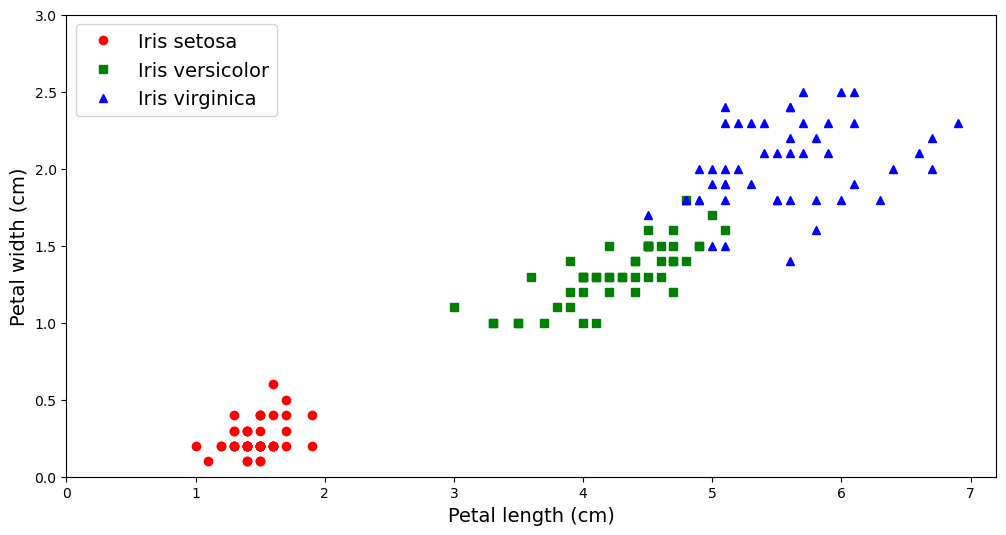

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(12, 6))

for idx, (name, style) in enumerate(zip(iris.target_names, ("ro", "gs", "b^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.axis([0, 7.2, 0, 3])
plt.legend()

plt.show()

Training a simple Decision Tree:

In [70]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(max_depth=2, random_state=100)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=100)

If we want to visualize our Decision Tree, we can use the library Graphviz:

<img src="./images/decision_tree_example.png">

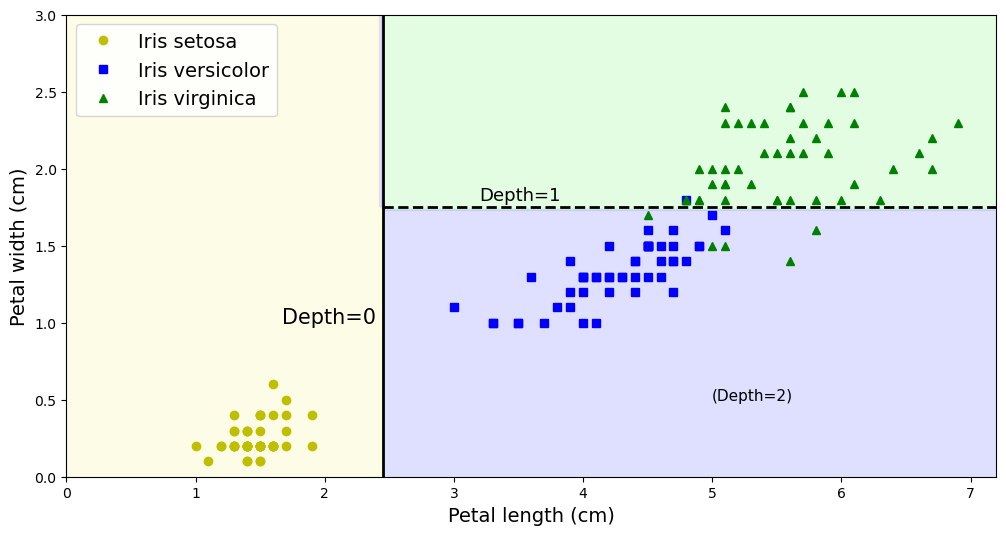

In [76]:
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(12, 6))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()

plt.show()

Decision Trees are intuitive, and their decisions are easy to interpret. Such models are often called white box models. In contrast, as we will see, Random Forests or neural networks are generally considered black box models. They make great predictions, and you can easily check the calculations that they performed to make these predic tions; nevertheless, it is usually hard to explain in simple terms why the predictions  were made. For example, if a neural network says that a particular person appears on a picture, it is hard to know what contributed to this prediction: did the model recog nize that person’s eyes? Their mouth? Their nose? Their shoes? Or even the couch  that they were sitting on? Conversely, Decision Trees provide nice, simple classifica tion rules that can even be applied manually if need be (e.g., for flower classification).

## Decision Trees for Regression
---
Did you know that Decision Trees can also work for regression?  
The logic is pretty much the same, but instead of predicting a class, it predicts a value (in this case, the _mean_ value of that subset):


Let's create a simple artificial dataset:

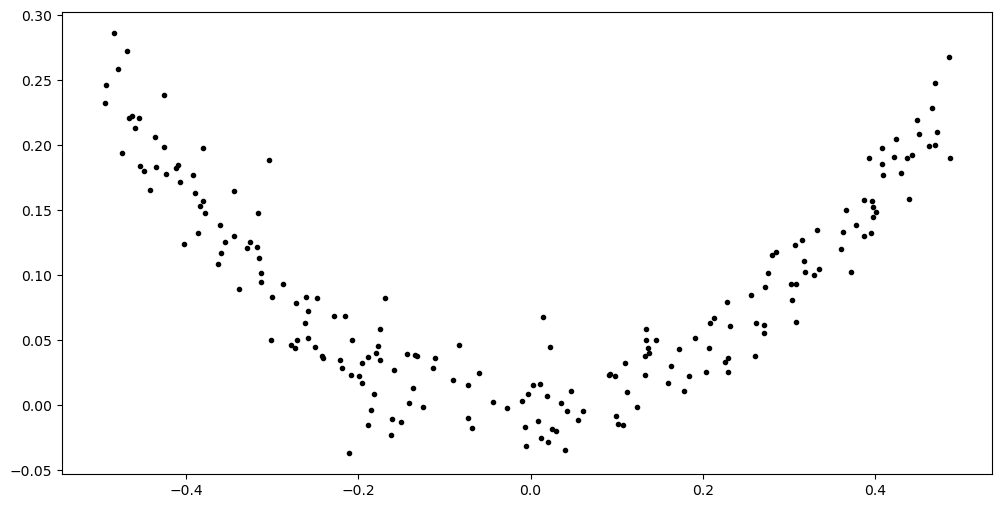

In [88]:
from turtle import color
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

plt.figure(figsize=(12, 6))
plt.plot(X_quad, y_quad, 'k.')
plt.show()


Now let's train our Decision Tree to predict values using the dataset created:

In [90]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42, )
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

<img src="./images/example_regression_tree.png">

If we want to see, graphically, how our decision tree regressor is behaving, we can plot the following graph:

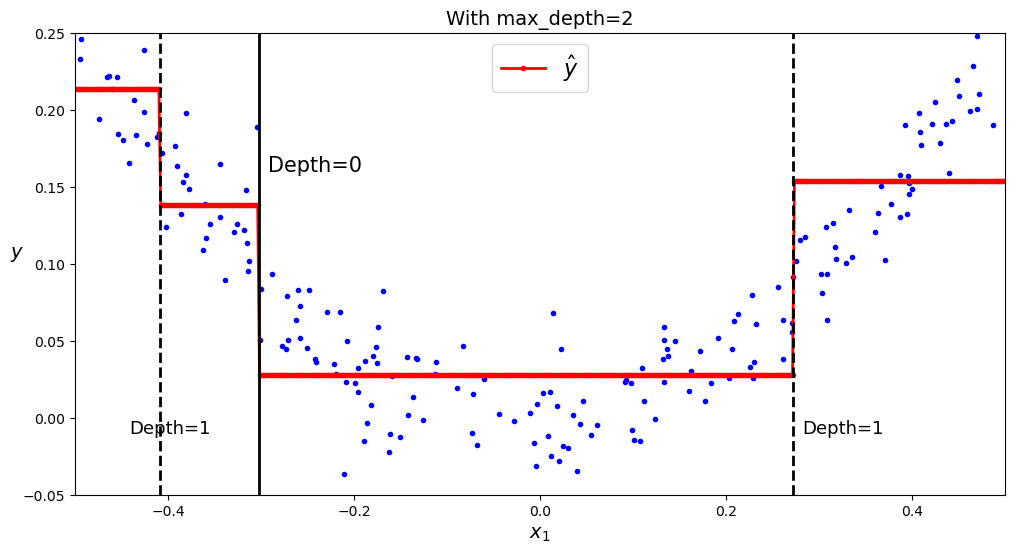

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor


np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=100)
tree_reg.fit(X_quad, y_quad)

def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(12, 6))

plot_regression_predictions(tree_reg, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0+0.01, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("With max_depth=2")

plt.show()

Now let's check what happen's when we increase the `max_depth` attribute:

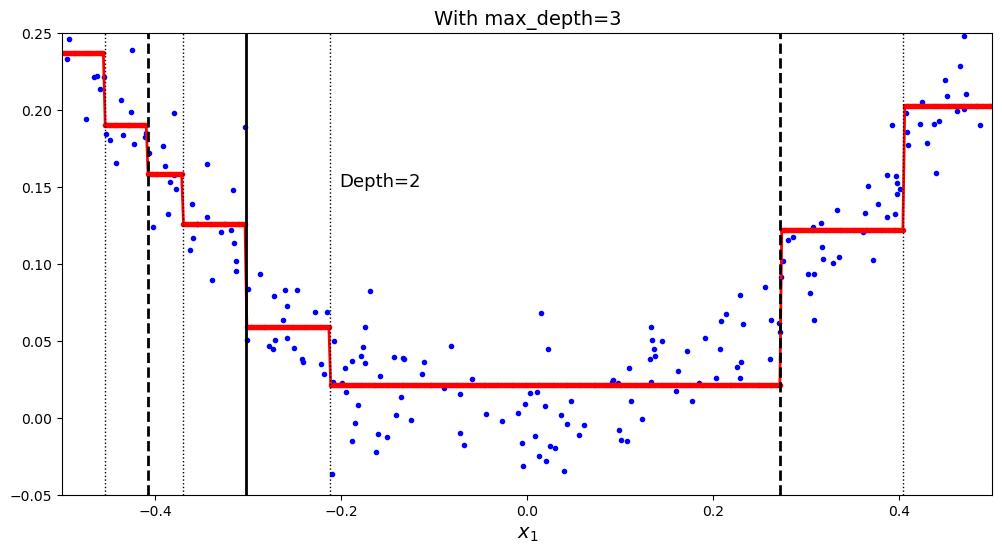

In [95]:
second_tree = DecisionTreeRegressor(max_depth=3, random_state=100)
second_tree.fit(X_quad, y_quad)

plt.figure(figsize=(12, 6))

th2s = second_tree.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(second_tree, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("With max_depth=3")

plt.show()

As you can see, with more depth, the more `mean` values the algorithm finds to fit our training data.

As we saw earlier, if `max_depth` is not specified, the algorithm will use as many nodes as it can to increase it's performance on the training set.

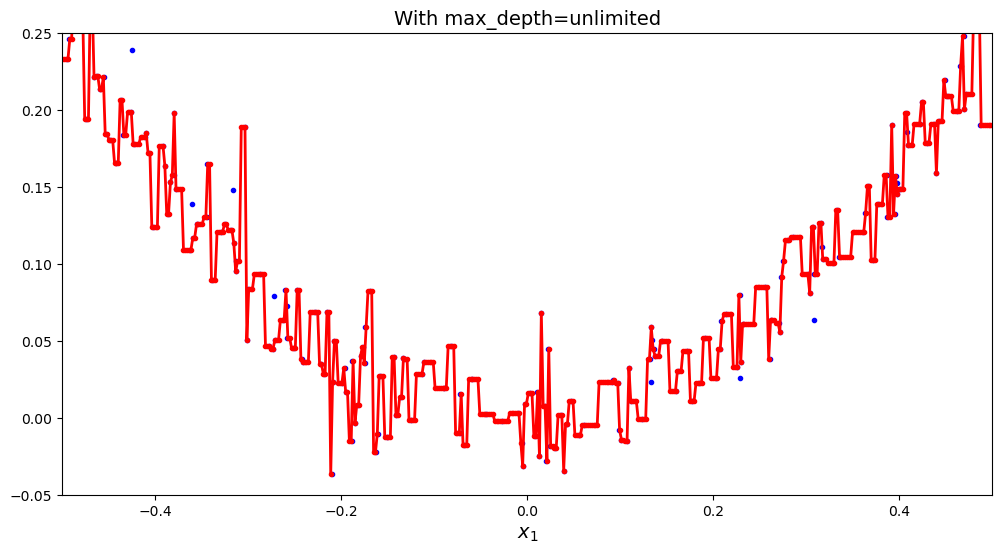

In [100]:
third_tree = DecisionTreeRegressor(random_state=100)
third_tree.fit(X_quad, y_quad)

plt.figure(figsize=(12, 6))

plot_regression_predictions(third_tree, X_quad, y_quad)

plt.title("With max_depth=unlimited")

plt.show()

As you can see above, it clearly _overfits_ the training data.